In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_excel('/content/HousePriceData.xlsx')
df.head()

,Size (sqft),Price (in Lakhs INR)
0,500,16
1,587,16
2,675,21
3,762,21
4,850,24


In [16]:
from google.colab import drive
drive.mount('/content/drive')

df.to_csv('/content/drive/MyDrive/my_dataset.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Size (sqft)           41 non-null     int64
 1   Price (in Lakhs INR)  41 non-null     int64
dtypes: int64(2)
memory usage: 788.0 bytes


In [18]:
df.isnull().sum()

,0
Size (sqft),0
Price (in Lakhs INR),0


In [19]:
features = 'Size (sqft)'
target = 'Price (in Lakhs INR)'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train)
predictions = lr.predict(X_test.values.reshape(-1, 1))

In [21]:
lr

LinearRegression()

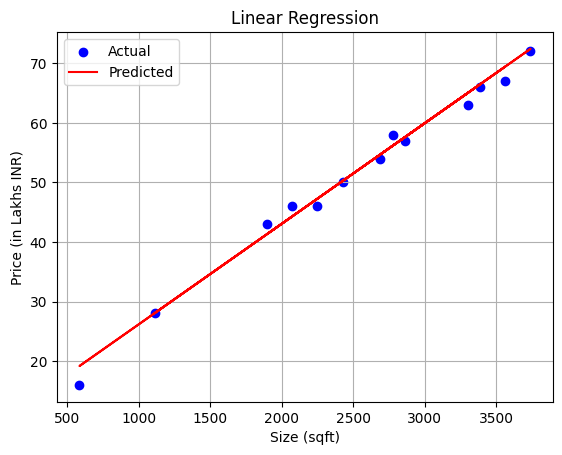

In [22]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='red')
plt.legend(['Actual', 'Predicted'])
plt.grid()
plt.xlabel(features)
plt.ylabel(target)
plt.title('Linear Regression')
plt.show()

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2740255452626283
MSE: 2.463140153763707
RMSE: 1.569439439342502
